# Exploración del Dataset

Este notebook proporciona información sobre cada .csv del dataset, contestando a estas preguntas:

- ¿Qué nos proporciona este archivo?
- ¿Qué columnas no son importantes para predicciones?
- ¿Qué predicciones puede ayudar a construir este archivo?

La estructura de este dataset és el siguiente:

- circuits.csv
- constructor_results.csv
- constructor_standings.csv 
- constructors.csv
- driver_standings.csv
- drivers.csv
- lap_times.csv
- pit_stops.csv
- qualifying.csv
- races.csv
- results.csv
- seasons.csv 
- sprint_results.csv
- status.csv

In [6]:
#Importar liberías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Circuits.csv

In [12]:
circuits_data = pd.read_csv('../data/original/circuits.csv')

print("Primeras 5 filas:")
display(circuits_data.head())

print("\nColumnas: ")
print(circuits_data.columns.tolist())

print(f"Registros: {circuits_data.shape[0]}")
print(f"Columnas: {circuits_data.shape[1]}")


Primeras 5 filas:


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park



Columnas: 
['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng', 'alt', 'url']
Registros: 77
Columnas: 9


### Análisis del archivo `circuits.csv`

1. ¿Qué nos proporciona este archivo?

Este archivo contiene información geográfica y descriptiva de cada circuito en el campeonato de F1.

La columnas principales són:
- `circuitId`: ID único del circuito
- `circuitRef`: Nombre simplificado del circuito
- `name`: Nombre del circuito
- `location`: Ciudad o región del circuito
- `country`: País
- `lat`, `lng`: Coordenadas geográficas
- `alt`: Altitud del circuito
- `url`: Enlace a Wikipedia

2. ¿Qué columnas son importantes para predicciones?

Las columnas importantes en este dataset són:
- `circuitId`: ID del circuito
- `country`: País del circuito
- `alt`, `lat`, `lng`: Útiles por si:
    - Altitud afecta el comportamiento del coche?
    - Latitud o país podría ser útil por el clima.

3. ¿Qué predicciones se pueden hacer?

Este archivo lo utilizaré solo para enriquerecer el dataset de entrenamiento.

## Constructor_results.csv

Primeras 5 filas:


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N



Columnas: 
['constructorResultsId', 'raceId', 'constructorId', 'points', 'status']


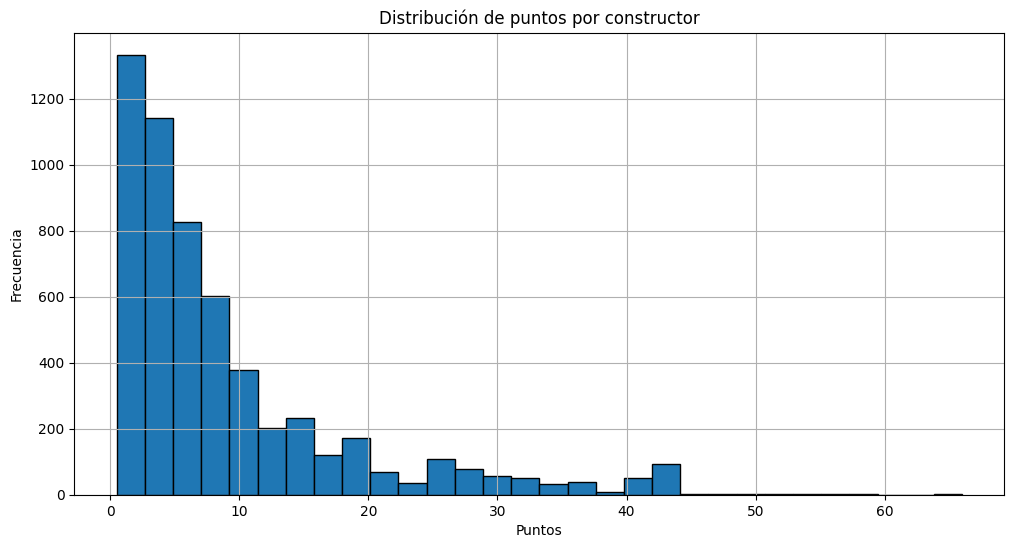


Status únicos:
['\\N' 'D']
Registros: 12625
Registros solo con puntos > 0: 5640
Columnas: 5


In [15]:
constructor_results = pd.read_csv('../data/original/constructor_results.csv')

print("Primeras 5 filas:")
display(constructor_results.head())

print("\nColumnas: ")
print(constructor_results.columns.tolist())

constructor_results_filtered = constructor_results[constructor_results['points'] > 0]

#Distribución de puntos por constructor
plt.figure(figsize=(12, 6))
constructor_results_filtered['points'].hist(bins=30, edgecolor='black')
plt.title('Distribución de puntos por constructor')
plt.xlabel('Puntos')
plt.ylabel('Frecuencia')
plt.show()

#Estados
print("\nStatus únicos:")
print(constructor_results['status'].unique())

print(f"Registros: {constructor_results.shape[0]}")
print(f"Registros solo con puntos > 0: {constructor_results_filtered.shape[0]}")
print(f"Columnas: {constructor_results_filtered.shape[1]}")